# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import GridSearchCV


In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [3]:
X, y = generate_dataset()

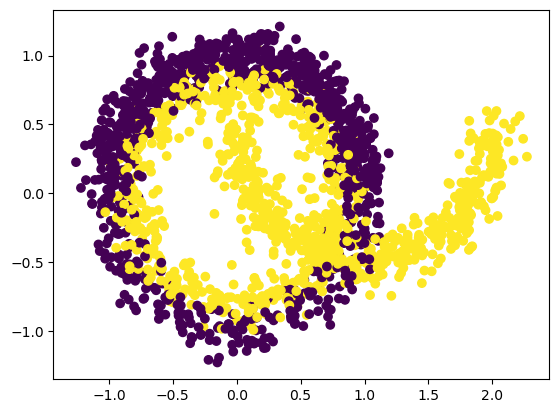

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
y.value_counts()

1    1000
0    1000
Name: y, dtype: int64

In [6]:
#splltting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Defining the hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 75,100 ],  
    'max_depth': [2,3, 5],  
    'min_samples_split': [2, 5, 10]  
}

# Initializing the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Performing GridSearchCV to tune hyperparameters
rf_gscv = GridSearchCV(rf_clf, param_grid=rf_params, cv=10, scoring='accuracy', refit=True)

# Fitting the model
rf_gscv.fit(X_train, y_train)
best_rf_model = rf_gscv.best_estimator_

# Printing the best estimator
print("Best Random Forest Estimator:", best_rf_model)

print(f'Random Forest Validation Accuracy: {rf_gscv.best_score_:.2%}')
print(f'Random Forest Test Accuracy: {rf_gscv.score(X_test, y_test):.2%}')


Best Random Forest Estimator: RandomForestClassifier(max_depth=5, random_state=42)
Random Forest Validation Accuracy: 84.86%
Random Forest Test Accuracy: 84.83%


Random Forest Test Precision: 82.08%


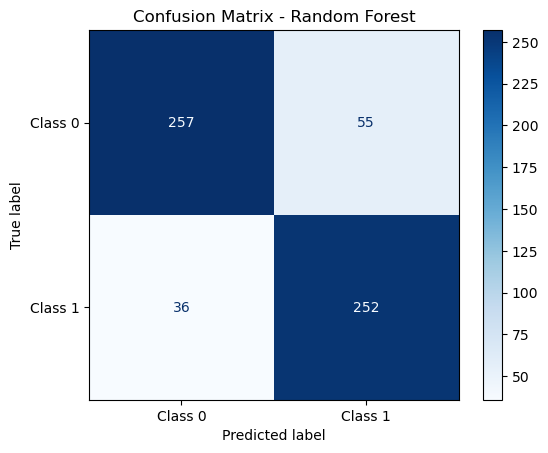

In [8]:
rf_test_pred = rf_gscv.predict(X_test)

# Calculating precision for the test data
precision = precision_score(y_test, rf_test_pred)

# Printing the precision
print(f'Random Forest Test Precision: {precision:.2%}')

# Computing the confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Insights
This indicates slightly more errors in predicting Class 0 compared to Class 1, affecting the overall precision and recall for Class 0. The test accuracy is strong, but the precision value indicates that out of all predicted Class 1 instances, some were incorrect due to the 55 false positives. The model handles balanced datasets well but can slightly favor false positives in this scenario.

# Bagging

In [9]:
# Defining parameters for GridSearchCV
params = {
    'n_estimators': [100, 200,350],              
    'estimator__max_depth': [ 5,10,20]          
}

# Initializing Bagging classifier with a Decision tree classifier as the estimator
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  
    random_state=42
)



In [10]:
# GridSearchCV for hyperparameter tuning
bag_gscv = GridSearchCV(
    bag_clf,
    param_grid=params,
    cv=10,                 
    scoring='accuracy',    
    refit=True             
)

# Fitting the model 
bag_gscv.fit(X_train, y_train)



GridSearchCV(cv=10,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             param_grid={'estimator__max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 350]},
             scoring='accuracy')

In [11]:
# Best parameters from GridSearchCV
print(f"Best parameters: {bag_gscv.best_params_}")

# Validation score from GridSearchCV
print(f"Bagging Validation Accuracy: {bag_gscv.best_score_:.2%}")

# Evaluate on the test set
bag_test_acc = bag_gscv.score(X_test, y_test)
print(f"Bagging Test Accuracy: {bag_test_acc:.2%}")


Best parameters: {'estimator__max_depth': 10, 'n_estimators': 100}
Bagging Validation Accuracy: 86.86%
Bagging Test Accuracy: 86.00%


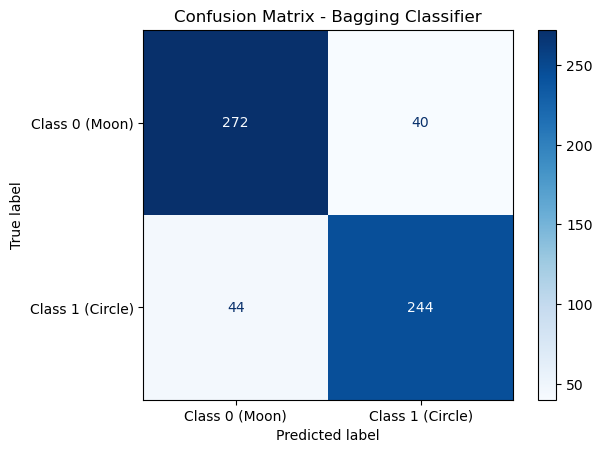

Classification Report:
                  precision    recall  f1-score   support

  Class 0 (Moon)       0.86      0.87      0.87       312
Class 1 (Circle)       0.86      0.85      0.85       288

        accuracy                           0.86       600
       macro avg       0.86      0.86      0.86       600
    weighted avg       0.86      0.86      0.86       600



In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# GeneratING predictions on the test set
bag_test_pred = bag_gscv.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, bag_test_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0 (Moon)", "Class 1 (Circle)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, bag_test_pred, target_names=["Class 0 (Moon)", "Class 1 (Circle)"]))

In [13]:
# Calculating precision for the test data
precision = precision_score(y_test, bag_test_pred)

# Printing the precision value
print(f'Bagging Test Precision: {precision:.2%}')

Bagging Test Precision: 85.92%


#  Insights
This indicates balanced performance, with slightly fewer errors in predicting Class 0 compared to Class 1. The test accuracy is high, supported by a competitive precision value. The model demonstrates good performance across both classes, with better handling of false positives for Class 1 than the Random Forest model. This suggests Bagging Classifier effectively reduces variance and generalizes well.

# ADA Boosting 


In [14]:
from sklearn.ensemble import AdaBoostClassifier

# Defining the parameter grid for AdaBoost
params = {
    'n_estimators': [50, 100, 200],          
    'estimator__max_depth': [1]       
}

# Initializing the AdaBoost classifier with a DecisionTreeClassifier as the estimator
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Updated to use `estimator`
    random_state=42
)


In [15]:
# Performing hyperparameter tuning with GridSearchCV
ada_gscv = GridSearchCV(
    ada_clf,
    param_grid=params,
    cv=10,                 
    scoring='accuracy',    
    refit=True             
)

# Fitting the model on the training data
ada_gscv.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             param_grid={'estimator__max_depth': [1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
# Output the best parameters and validation accuracy
print(f"Best Parameters (AdaBoost): {ada_gscv.best_params_}")
print(f"AdaBoost Validation Accuracy: {ada_gscv.best_score_:.2%}")

# Evaluating  the model on the test data
ada_test_acc = ada_gscv.score(X_test, y_test)
print(f"AdaBoost Test Accuracy: {ada_test_acc:.2%}")

Best Parameters (AdaBoost): {'estimator__max_depth': 1, 'n_estimators': 50}
AdaBoost Validation Accuracy: 85.71%
AdaBoost Test Accuracy: 85.00%


AdaBoost Test Precision: 86.94%


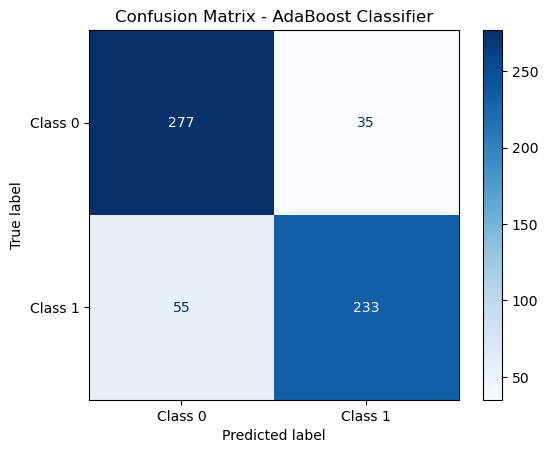

In [17]:
ada_test_pred = ada_gscv.predict(X_test)

# Calculating precision for the test data
ada_precision = precision_score(y_test, ada_test_pred)

# Printing the precision value
print(f'AdaBoost Test Precision: {ada_precision:.2%}')

# Computing the confusion matrix
ada_cm = confusion_matrix(y_test, ada_test_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=ada_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()

The model is okay at predicting Class 0 than Class 1, with fewer errors for Class 0. While the accuracy is good, the higher number of false negatives (55) for Class 1 suggests that the model misses some positive cases. However, it still performs well overall. AdaBoost's boosting mechanism handles the dataset reasonably well, but its performance is slightly lower than Bagging possibly due to its reliance on weak learners.

# Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining the parameter grid for Gradient Boosting
params = {
    'n_estimators': [50, 100, 120],          
    'max_depth': [ 1,2, 10],                 
    'learning_rate': [ 0.1, 0.2,0.4]}


In [19]:

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Performing hyperparameter tuning with GridSearchCV
gb_gscv = GridSearchCV(
    gb_clf,
    param_grid=params,
    cv=10,                 
    scoring='accuracy',    
    refit=True             
)


In [20]:
# Fitting the model on the training data
gb_gscv.fit(X_train, y_train)

# Output the best parameters and validation accuracy
print(f"Best Parameters (Gradient Boosting): {gb_gscv.best_params_}")
print(f"Gradient Boosting Validation Accuracy: {gb_gscv.best_score_:.2%}")

# Evaluate the model on the test data
gb_test_acc = gb_gscv.score(X_test, y_test)
print(f"Gradient Boosting Test Accuracy: {gb_test_acc:.2%}")

Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
Gradient Boosting Validation Accuracy: 87.14%
Gradient Boosting Test Accuracy: 86.00%


Gradient Boosting Test Precision: 87.23%


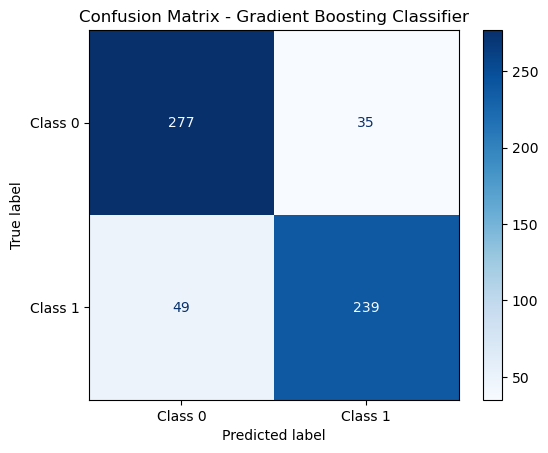

In [21]:
# Generating predictions on the test set
gb_test_pred = gb_gscv.predict(X_test)

# Calculating precision for the test data
gb_precision = precision_score(y_test, gb_test_pred)

# Printing the precision value
print(f'Gradient Boosting Test Precision: {gb_precision:.2%}')

# Computing the confusion matrix
gb_cm = confusion_matrix(y_test, gb_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

# Findings :
1. Random Forest:
Achieved solid validation and test accuracy. Precision was slightly lower compared to other ensemble models, but it remains a reliable choice with good generalization.

2. Bagging Classifier:
Demonstrated strong validation and test accuracy, slightly outperforming Random Forest.
Precision was competitive, making it a robust model for balanced datasets.

3. AdaBoost:
Delivered reasonable accuracy and the highest precision among the models. Performs well when precision is prioritized, though its overall accuracy lagged slightly behind Gradient Boosting.

4. Gradient Boosting:
Emerged as the best overall model with the highest validation and test accuracy. Precision was the highest, highlighting its effectiveness in handling complex patterns in the data.